# Pathfinder Master Notebook  
### (Author - Mark McDonald - 5/12/2019)
This notebook uses the following support scripts to preprocess data and train models:  
1) data_preprocess.py (imported as pf_preprocess)  
2) video_support_processes.py (imported as pf_video)  
3) models.py (imported as pf_models)



## STEP 1 - Set Backend For GPU Support
This can be commented out if an Nvidia GPU is being used

In [1]:
# Check that the current directory is '.../code'
import os
# fix libiomp5.dylib error for mac
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [2]:
# OPTIONAL SETTING
# Here we override the keras backend env variable to use plaidml
# plaidml can make use of AMD GPUs 
# This assignment needs to be added before loading keras libraries

# os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

# to install plaidML, activate appropriate environment and then:
#   pip install -U plaidml-keras
#   plaidml-setup

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

## STEP 2 - Check that you are in the correct current directory

In [4]:
pwd = !pwd
if pwd[0][-4:] != "code":
    print("ERROR: You're currently not in the project's code directory.")
    print(pwd[0])
else:
    print("SUCCESS: You are in the 'code' directory")
    print(pwd[0])
    import data_preprocess as pf_preprocess
    import models as pf_model
    import video_support_processes as pf_video

SUCCESS: You are in the 'code' directory
/Users/markmcdonald/Desktop/pathfinder/code


## STEP 3 - Set Variables
These must be set to match the local environment.  
No other items in the notebook need to be modified except these varables.

In [5]:
# This is where data downloaded from http://www.mikeprocopio.com/labeledlagrdata.html should exist
original_train_dir = '/Volumes/Photos-BACKUP/89FinalProject/89FinalData/orig_train_data'
original_test_dir = '/Volumes/Photos-BACKUP/89FinalProject/89FinalData/orig_test_data'

# This is where directories containing data extracted from original data will be placed.
base_dir = '/Volumes/Photos-BACKUP/89FinalProject/89FinalData'

# This is the percentage of validation data
val_split = .15

In [6]:
# Test that supplied source data directory exists
if not os.path.exists(original_train_dir):
    print("ERROR: Please supply a valid local directory that hold downloaded source train data.")
    print("Source data can be downloaded from http://www.mikeprocopio.com/labeledlagrdata.html.")
else:
    print("SUCCESS: Found original train data directory: {}".format(original_train_dir))

# Test that supplied test data directory exists
if not os.path.exists(original_test_dir):
    print("ERROR: Please supply a valid local directory that hold downloaded source test data.")
    print("Source data can be downloaded from http://www.mikeprocopio.com/labeledlagrdata.html.")
else:
    print("SUCCESS: Found original test data directory: {}".format(original_test_dir))
    

# Test that supplied base data directory exists
if not os.path.exists(base_dir):
    print("ERROR: Please create a directory that will be used to store extracted source data.")
    print("ERROR: Doesn't Exist: ", base_dir)
else:
    print("SUCCESS: Found base directory: {}".format(base_dir))
    

SUCCESS: Found original train data directory: /Volumes/Photos-BACKUP/89FinalProject/89FinalData/orig_train_data
SUCCESS: Found original test data directory: /Volumes/Photos-BACKUP/89FinalProject/89FinalData/orig_test_data
SUCCESS: Found base directory: /Volumes/Photos-BACKUP/89FinalProject/89FinalData


### Create Train and Validation Directories
Create necessary support directories under the 'base_dir'

In [7]:
# Here we establish the supporting directories for our training and validation data
# The True parameter will erase any pre-existing data in the directries
# Setting this parameter to False will only set the variables and assumed that directories already exist with data
train_dir, train_video_dir, val_dir, test_dir, results_dir = pf_preprocess.set_directories(base_dir, True)

Erased and Created Train Directory: /Volumes/Photos-BACKUP/89FinalProject/89FinalData/train
Created Train Images Directory: /Volumes/Photos-BACKUP/89FinalProject/89FinalData/train/images
Created Train Images Data Directory: /Volumes/Photos-BACKUP/89FinalProject/89FinalData/train/images/data
Created Train Masks Directory: /Volumes/Photos-BACKUP/89FinalProject/89FinalData/train/masks
Created Train Masks Data Directory: /Volumes/Photos-BACKUP/89FinalProject/89FinalData/train/masks/data
Created Video Dir: /Volumes/Photos-BACKUP/89FinalProject/89FinalData/train/video
Erased and Created Validation Directory: /Volumes/Photos-BACKUP/89FinalProject/89FinalData/val
Created Validation Images Dir: /Volumes/Photos-BACKUP/89FinalProject/89FinalData/val/images
Created Validation Data Images Dir: /Volumes/Photos-BACKUP/89FinalProject/89FinalData/val/images/data
Created Validation Masks Dir: /Volumes/Photos-BACKUP/89FinalProject/89FinalData/val/masks
Created Validation Data Masks Dir: /Volumes/Photos-B

## STEP 4 -  Extract Data From Downloaded Files
Use the downloaded MAT files to extract the image and mask data saving the images and masks to supporting directories

In [8]:
# Here we extract the image and mask data from our original data stored in MAT files
pf_preprocess.create_img_and_mask_data(original_train_dir, train_dir)

# For the test directories, masks won't be created
pf_preprocess.create_img_and_mask_data(original_test_dir, test_dir)


Source Data Directory:  /Volumes/Photos-BACKUP/89FinalProject/89FinalData/orig_train_data/labeled_lagr_data_640x480_DS1A
Extracted Images:  /Volumes/Photos-BACKUP/89FinalProject/89FinalData/train/images/data
Extracted Masks:  /Volumes/Photos-BACKUP/89FinalProject/89FinalData/train/masks/data

Source Data Directory:  /Volumes/Photos-BACKUP/89FinalProject/89FinalData/orig_train_data/labeled_lagr_data_640x480_DS1B
Extracted Images:  /Volumes/Photos-BACKUP/89FinalProject/89FinalData/train/images/data
Extracted Masks:  /Volumes/Photos-BACKUP/89FinalProject/89FinalData/train/masks/data

Source Data Directory:  /Volumes/Photos-BACKUP/89FinalProject/89FinalData/orig_train_data/labeled_lagr_data_640x480_DS2A
Extracted Images:  /Volumes/Photos-BACKUP/89FinalProject/89FinalData/train/images/data
Extracted Masks:  /Volumes/Photos-BACKUP/89FinalProject/89FinalData/train/masks/data

Source Data Directory:  /Volumes/Photos-BACKUP/89FinalProject/89FinalData/orig_train_data/labeled_lagr_data_640x480_D

In [9]:
# Validation images and masks are pulled out of the training set and put into validation directories
pf_preprocess.create_val_set(train_dir, val_dir, val_split)


Moved 90 validation images to /Volumes/Photos-BACKUP/89FinalProject/89FinalData/val/images/data
Moved 90 validation images to /Volumes/Photos-BACKUP/89FinalProject/89FinalData/val/masks/data


We now have images and masks in separate directories and files.  
These will be used to train our network.

## SIDEBAR: Understanding the data set

Let's take a moment to understand the data that we are working with.  You can skip this, if you like, and proceed to step 5.  

The downloaded data is in MAT file format.  The MAT files contain a dictionary or data elements, some of which we will use for our process.

In [10]:
# Review the original data
import scipy.io
mat_file_path = os.path.join(original_train_dir, 'labeled_lagr_data_640x480_DS1A/frame001.mat')
mat_file = scipy.io.loadmat(mat_file_path)
# Dictionary entries in the MAT file
for k in mat_file.keys():
    print(k)

__header__
__version__
__globals__
im_disparity
im_rgb
stereo_diff_disparity
stereo_disparity_valid
stereo_max_disparity
stereo_min_disparity
frame_number_a
frame_number_b
frame_number_c
image_timestamp
extract_timestamp
extract_author
extract_version
stereo_mask_precalc
feature_image_precalc
manual_human_labeling_mask


Each MAT file has a number of pieces of data.  For this project, we will only use  
the 'im_rgb' and 'manual_human_labeling_mask'.

In [11]:
# Original images are 640 x 480 (note that this is a vertical format)
orig_image = mat_file['im_rgb']
print("Image Shape: ", orig_image.shape)

Image Shape:  (640, 480, 3)


In [12]:
# Masks are the same size as the images but only one channel.
orig_mask = mat_file['manual_human_labeling_mask']
print("Mask Shape: ",orig_mask.shape)

Mask Shape:  (640, 480)


In [13]:
# The values in the mask range from 0 to 2 as expected
import numpy as np
print(np.amin(orig_mask))
print(np.amax(orig_mask))

0
2


0's are the ground plane.  1's are obstacles and 2's are unidentified.   
We are only interesting in the ground plane.  
We will modify these masks later so that they contain only 0's and 1's.  
First, we are going to create supoerimposed videos of the image sequences  
with the 3-value masks. This will make for a more interesting presented overlay.

In [14]:
# Test file does not have the same data elements
mat_test_file_path = os.path.join(original_test_dir, 'labeled_lagr_data_640x480_DS2A_SupplementalFrames_101-624/frame620.mat')
mat_test_file = scipy.io.loadmat(mat_test_file_path)
# Dictionary entries in the MAT file
for k in mat_test_file.keys():
    print(k)

__header__
__version__
__globals__
im_disparity
im_rgb
stereo_diff_disparity
stereo_disparity_valid
stereo_max_disparity
stereo_min_disparity
frame_number_a
frame_number_b
frame_number_c
image_timestamp
extract_timestamp
extract_author
extract_version


Note that the test files are missing the labeled mask.

## End of the SIDEBAR
Let's get back to work

## STEP 5 - Create a superimpsed video file based on original data
Use the images and masks to create a video with the masks superimposed on the images.  These videos are a simple demonstration to show what a superimposed mask looks like from the training data set.  These will be perfect masks because they were manually created.  Later, we will develop a model that will create the masks for us.

In [15]:
pf_video.create_superimposed_video_from_MATFiles(original_train_dir, train_video_dir)

Video created /Volumes/Photos-BACKUP/89FinalProject/89FinalData/train/video/DS1A.mp4
Video created /Volumes/Photos-BACKUP/89FinalProject/89FinalData/train/video/DS1B.mp4
Video created /Volumes/Photos-BACKUP/89FinalProject/89FinalData/train/video/DS2A.mp4
Video created /Volumes/Photos-BACKUP/89FinalProject/89FinalData/train/video/DS2B.mp4
Video created /Volumes/Photos-BACKUP/89FinalProject/89FinalData/train/video/DS3A.mp4
Video created /Volumes/Photos-BACKUP/89FinalProject/89FinalData/train/video/DS3B.mp4


['/Volumes/Photos-BACKUP/89FinalProject/89FinalData/train/video/DS1A.mp4',
 '/Volumes/Photos-BACKUP/89FinalProject/89FinalData/train/video/DS1B.mp4',
 '/Volumes/Photos-BACKUP/89FinalProject/89FinalData/train/video/DS2A.mp4',
 '/Volumes/Photos-BACKUP/89FinalProject/89FinalData/train/video/DS2B.mp4',
 '/Volumes/Photos-BACKUP/89FinalProject/89FinalData/train/video/DS3A.mp4',
 '/Volumes/Photos-BACKUP/89FinalProject/89FinalData/train/video/DS3B.mp4']

We now have a video that has an overlay of the path for each of the training scenes.

## STEP 6 - Change the mask data to Binary Values
The mask data contains 3 values that represent path(0), obstacle(1) and unknown(2).  
We are only interested in what is a path or not so using 3 values to train our model is not necessary  
and could potentially cause confusion during training and slow the training process with no benefit.  
We will change the masks to reflect the binary nature of our desired masks where the path is a 1 and everything else is a 0.  
This change is done in-place and will change the original masks.  
If we want 3-value masks again, we will need to recreate our dataset with the steps above.

In [16]:
# In-place conversion of original masks to binary masks for training purposes
# This will destory the original masks and repalce them with binary masks
pf_preprocess.convert_jpg_mask_to_binary_mask(os.path.join(train_dir, 'masks'))
pf_preprocess.convert_jpg_mask_to_binary_mask(os.path.join(val_dir, 'masks'))

Converted 510 masks in /Volumes/Photos-BACKUP/89FinalProject/89FinalData/train/masks/data
Converted 0 masks in /Volumes/Photos-BACKUP/89FinalProject/89FinalData/train/masks
Converted 90 masks in /Volumes/Photos-BACKUP/89FinalProject/89FinalData/val/masks/data
Converted 0 masks in /Volumes/Photos-BACKUP/89FinalProject/89FinalData/val/masks


0

### Sample Image and Overlay
Take a sample to see that the conversion produces a reasonable mask

In [17]:
# Displays and image with a mask overlay
from keras.preprocessing import image as kimage
def display_overlay(image, mask, ispath=True):
    if ispath:   
        image = kimage.load_img(image)
        mask = kimage.load_img(mask)
        image = np.uint8(image)
        mask = np.asarray(mask)

    noneType = type(None)
        
    if type(mask) != noneType:
        # make red layer for mask
        mask = np.moveaxis(mask, 2, 0)
        new_mask = np.zeros((3, mask.shape[1], mask.shape[2]))
        new_mask[0] = np.array(mask[0]==0)*180
        new_mask[1] = np.array(mask[0]==1)*180

        new_mask = np.moveaxis(new_mask, 0, 2)

        image = np.uint8(new_mask*.3 + image*.7)
            
    if image.shape[2] != 3:
        image = np.uint8((np.zeros(shape=(360,480,3))) + image)
    plt.imshow(np.uint8(image))


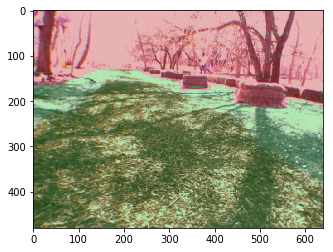

In [18]:
imagefiles = sorted(os.listdir(os.path.join(train_dir, 'images', 'data')))
maskfiles = sorted(os.listdir(os.path.join(train_dir, 'masks', 'data')))
test_image = os.path.join(train_dir, 'images', 'data', imagefiles[0])
test_mask = os.path.join(train_dir, 'masks', 'data', maskfiles[0])

display_overlay(test_image, test_mask, ispath=True)

## Data Preparation is Complete
We now have a local data set of images and masks separated by training and validation sets.
We can now proceed to train our model.
***

## STEP 7 -  Model Training
Using get_models() will retrieve a series of defined models that can be trained.  
get_models() will return a list of all defined models and a description of the model.  
Each list entry consists of a tuple where the first element is a dictionary of paramters  
and the second element is the corresponding model.

### Data Generators (train, validate and test)

Generators are defined in the models.py script.  
One generator is defined for the training images and masks 
and another is defined for the validation images and masks.  
Each generator will return an image and a mask for the image.  
For the training generator, an augmented image and identically augmented mask is produced.
Batch sizes are defined in the 'description' dictionary from the model_tuple.

In [19]:
from keras import models
from keras import layers

In [20]:
# get a model tuple to test the generators with
model_tuples = []
model_tuples.append(pf_model.get_autoenc_model(epochs=40, 
                                                 rot=20, 
                                                 zoom=[.7,1.0], 
                                                 hflip=True, 
                                                 vflip=True,
                                                 notes="test model"))

Instructions for updating:
Colocations handled automatically by placer.


We use a support function to create a model.  The function will return a model as well as a 'description' dictionary that includes the settings used in the model.  This description is used during training to ensure that properly configured data generators are created and also serves as a way to see the model settings after it is done training and saved.

In [21]:
model_tuples[0]

({'Model_Type': 'CNN_encoder2400',
  'input_height': 360,
  'input_width': 480,
  'color': True,
  'output_height': 360,
  'output_width': 480,
  'l2_lambda': 0,
  'final_activation': 'relu',
  'optimizer': 'adadelta',
  'loss': 'binary_crossentropy',
  'learn_rate': None,
  'batch_size': 64,
  'epochs': 40,
  'rotation': 20,
  'zoom': [0.7, 1.0],
  'hflip': True,
  'vflip': True,
  'dropout': 0,
  'epoch_time': 1558355812,
  'fill_mode': 'nearest',
  'notes': 'test model',
  'name': '1558355812_CNN_encoder2400_epochs=40_notes=test model'},
 <keras.engine.training.Model at 0xb45aef978>)

### Generator for training images and masks

In [22]:
description = model_tuples[0][0]
train_generator = pf_model.get_img_mask_generator(os.path.join(train_dir, 'images'), 
                                             os.path.join(train_dir, 'masks'), 
                                             description)

Creating generator:
	/Volumes/Photos-BACKUP/89FinalProject/89FinalData/train/images
	/Volumes/Photos-BACKUP/89FinalProject/89FinalData/train/masks
	Augemntation:  True
Found 510 images belonging to 1 classes.
Found 510 images belonging to 1 classes.


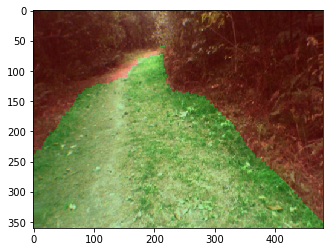

In [24]:
import cv2
image, mask = next(train_generator)

image1 = np.uint8(np.asarray(image[0]*255)) # genereated image is scaled to 1/255
mask1 = np.uint8(mask[0]) # mask wasn't rescaled because values are 0 or 1
display_overlay(image1,mask1, ispath=False)

The image produced is an augmented image where both the image and mask are identically augmented.

### Generator for validation images and masks

In [25]:
val_generator = pf_model.get_img_mask_generator(os.path.join(val_dir, 'images'), 
                                           os.path.join(val_dir, 'masks'), 
                                           description,
                                           augment=False)

Creating generator:
	/Volumes/Photos-BACKUP/89FinalProject/89FinalData/val/images
	/Volumes/Photos-BACKUP/89FinalProject/89FinalData/val/masks
	Augemntation:  False
Found 90 images belonging to 1 classes.
Found 90 images belonging to 1 classes.


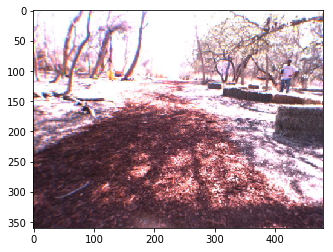

In [26]:
import cv2
image, mask = next(val_generator)

image = np.uint8(np.asarray(image[0]*255)) # genereated image is scaled to 1/255
mask = np.uint8(mask[0]) # mask wasn't rescaled because values are 0 or 1
display_overlay(image,None, ispath=False)

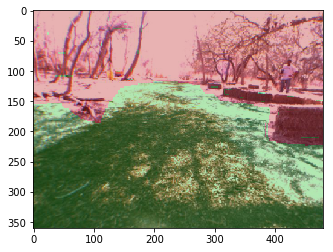

In [27]:
display_overlay(image,mask, ispath=False)

A radomnly selected image and mask from the generator are overlayed.  
We can see that the overlay matches the same augmentation as the image.

### Generator for test images
We will also use a generator to generate images from our test directory.  These images will be used to create masks from our model later.  This generator is created as a simplified way to generate test images in the same way that our model was trained with.

In [28]:
test_generator = pf_video.get_test_img_generator(os.path.join(test_dir, 'images'), description, batch_size=1)

Creating test image generator:
	/Volumes/Photos-BACKUP/89FinalProject/89FinalData/test/images
Found 891 images belonging to 1 classes.


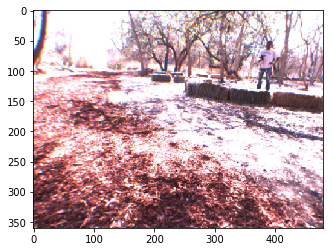

In [29]:
import cv2
image = next(test_generator)
display_overlay(image[0], None, ispath=False)

Now that we are certain that our data generators are doing what we want, we can start training a real model.

### Train

In [30]:
# After training, we will save the description and the trained model weights in a pickle variable
# Here we define functions to help is with pickle file handling.
import pickle

# Use pickle to save history for later use
def pickle_save(variable, save_path):
    save_file = save_path + '/data.pickle'
    if os.path.isdir(save_path) == 0:
        os.mkdir(save_path)
    with open(save_file, 'wb') as f:
        pickle.dump(variable, f)

# Loading a prevously saved pickle file
def pickle_load(pickel_filepath):
    with open(pickel_filepath, 'rb') as f:
        data = pickle.load(f)
        return data

First, we need to use our get_model() function to get a model with provided argument settings.

In [31]:
# Get models for training
model_tuples = []
# The following model parameters were determined to provide the best overal results
model_tuples.append(pf_model.get_autoenc_model(epochs=40, 
                                                 rot=30, 
                                                 zoom=[.6,1.0], 
                                                 hflip=True, 
                                                 vflip=True,
                                                 dropout=.4,
                                                 notes="rot30-.6-1.0zoom_dropout=.4BEST"))  
# Additional items can be added to model_tuples to train several models sequentially
# model_tuples.append(pf_model.get_autoenc_model(epochs=50, 
#                                                  rot=30, 
#                                                  zoom=[.6,1.0], 
#                                                  hflip=True, 
#                                                  vflip=True,
#                                                  dropout=.2,
#                                                  notes="rot30-.6-1.0zoom_dropout=.2"))  #

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Next, is the training step.  This will train each model in the model_tuples list sequentially.  
This step will automatically create a test video with the trained model.  
Training progress charts can be seen in Tensorboard.

In [34]:
from tensorflow.keras.callbacks import TensorBoard
import math
import shutil

num_models = len(model_tuples)

# a model_tupled object can contain multiple models
# us pf_model.get_autoencoder_model() method to create tuples
for i, model_tuple in enumerate(model_tuples):
    description = model_tuple[0]
    model = model_tuple[1]
    
    # Compile model
    optimizer = description['optimizer']
    loss = description['loss']
    model.compile(optimizer=optimizer, loss=loss)
    
    # Add Tensorboard capability
    name = description["name"]
    logdir = os.path.join(base_dir, "logs" , name)
#     tensorboard = TensorBoard(log_dir="logs/{}".format(name))
    tensorboard = TensorBoard(log_dir=logdir)

    # remove the logging directory for the model if it exists
#     if ( os.path.isdir("logs/{}".format(name)) ):
#         shutil.rmtree("logs/{}".format(name))
    if os.path.isdir(logdir):  shutil.rmtree(logdir)
    
    # get number of images to train and validate
    num_timages = len(os.listdir(os.path.join(train_dir, 'images', 'data')))
    num_vimages = len(os.listdir(os.path.join(val_dir, 'images', 'data')))
    
    # create generators based on the model description variables
    train_gen = pf_model.get_img_mask_generator(os.path.join(train_dir, 'images'), 
                                             os.path.join(train_dir, 'masks'), 
                                             description,
                                             augment=True)
    val_gen = pf_model.get_img_mask_generator(os.path.join(val_dir, 'images'), 
                                         os.path.join(val_dir, 'masks'), 
                                         description,
                                         augment=False)
    
    epochs = description["epochs"]
    batch_size = description["batch_size"]
    
    print(model.summary())
    
    # step_per_epcoch and val_steps is numbner of images / batchsize
    history = model.fit_generator(train_gen, 
                                  steps_per_epoch=math.ceil(num_timages/batch_size), 
                                  epochs=epochs, verbose=1, 
                                  callbacks=[tensorboard],
                                  validation_data=val_gen, 
                                  validation_steps=math.ceil(num_vimages/batch_size),
                                  use_multiprocessing=True, 
                                  shuffle=True)
        
    results = model.evaluate_generator(val_gen, steps=math.ceil(num_vimages/batch_size))
    
    description.update({"history": history})
    description.update({"results": results})
    
    acc = str(np.round(results, decimals=4))
    print("Final Accuracy: ", acc)
    
    # Create overlay text and prepare a directory to save video and pickle file
    overlay_text = name + "_loss=" + acc
    source_dir = test_dir
    target_dir = os.path.join(results_dir, overlay_text) 
    os.mkdir(target_dir)
    
    # Save description and model in a pickle file
    pickle_save((description, model), target_dir)
    
    print(description)

    # Create video with mask overlay generated from model
    pf_video.create_video_with_test_data(source_dir, model, description, target_dir)

Creating generator:
	/Volumes/Photos-BACKUP/89FinalProject/89FinalData/train/images
	/Volumes/Photos-BACKUP/89FinalProject/89FinalData/train/masks
	Augemntation:  True
Found 510 images belonging to 1 classes.
Found 510 images belonging to 1 classes.
Creating generator:
	/Volumes/Photos-BACKUP/89FinalProject/89FinalData/val/images
	/Volumes/Photos-BACKUP/89FinalProject/89FinalData/val/masks
	Augemntation:  False
Found 90 images belonging to 1 classes.
Found 90 images belonging to 1 classes.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 360, 480, 3)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 360, 480, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 180, 240, 16)      0         
___________________________________________

Processing batch: 1/1 | Max/Min/Avg mask value: 171.19000244140625/-0.0/40.7400016784668
Video created /Volumes/Photos-BACKUP/89FinalProject/89FinalData/results/1558355901_CNN_encoder2400_epochs=40_notes=rot30-.6-1.0zoom_dropout=.4BEST_loss=0.5912/1558355901_CNN_encoder2400_epochs=40_notes=rot30-.6-1.0zoom_dropout=.4BEST.mp4


## Done!
A superimposed test video has been created in the directory indicated at the end of the output in the previous step.  The model parameters can be changed to explore settings that may provide better results.  Please let me know if you find a better combination of parameters.  mcdomx@me.com.

---  
---  

## SUPPORT PROCESSES: Variational AutoEncoder Design
These steps are to help with model design so that the dimensions can be seen.  The final model is stored in the models.py support script.

In [ ]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Dropout
from keras.models import Model
from keras import backend as K
from keras import regularizers

input_img = Input(shape=(360, 480, 1))

x = Conv2D(16, (3, 3), activation='relu', padding='same', activity_regularizer=regularizers.l2(10e-5))(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Dropout(.1)(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((3, 3), padding='same')(x)
encoder = Model(input_img, encoded)

# at this point the representation is (15, 20, 8) i.e. 2400-dimensional
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((3, 3))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [ ]:
autoencoder.summary()